## **Clean Data**

The objective is to create a model to predict which people would survive based on the following fields:

- **Name** (str) - The passenger name
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### **Reading Data From CVS File**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

ship = pd.read_csv("data_1.csv", index_col= False)
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Filling Missing Data** ###

In [3]:
ship.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Replacing missing age with the mean of the existing ages**

In [4]:
ship['Age'].fillna(ship['Age'].mean(), inplace=True)
ship.to_csv('fillin_age.csv',index=False )
ship.head(12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### **Combine SibSp & Parch** ##

<Figure size 640x480 with 0 Axes>

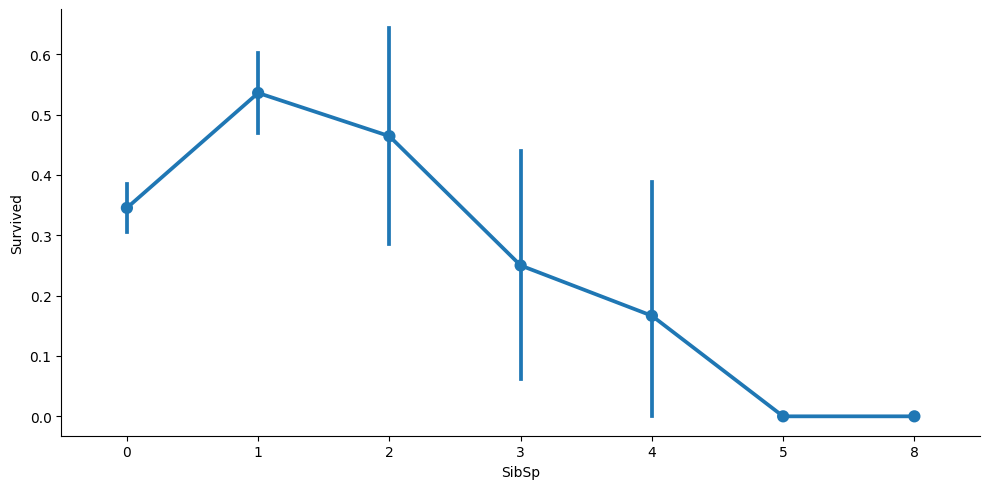

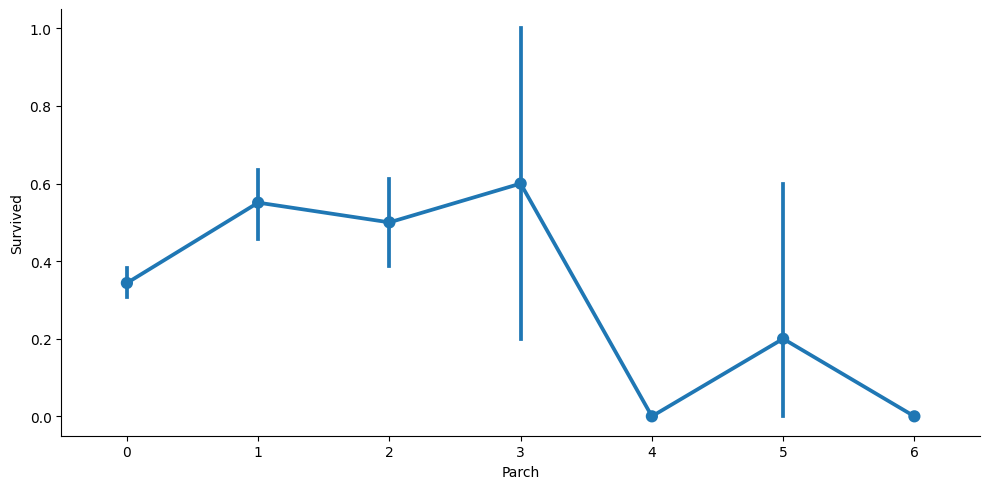

In [5]:
ship= pd.read_csv("fillin_age.csv", index_col= False)
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=ship, kind='point', aspect=2 )

In [6]:
ship['Family_memb'] = ship['Parch'] + ship ['SibSp']
ship.to_csv('combined_family_memb.csv',index=False )
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_memb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### **Drop Unnecessary Variables** 

In [7]:
ship= pd.read_csv("combined_family_memb.csv")
ship.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
ship.to_csv('dropped_unnec_var.csv',index=False )

ship.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_memb
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### **Clean Categorical Variables**

In [8]:
ship= pd.read_csv("dropped_unnec_var.csv")
ship.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_memb      0
dtype: int64

**Fill in missing and create indicator for cabin**

In [9]:
ship= pd.read_csv("dropped_unnec_var.csv")
ship.groupby(ship['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [42]:
ship= pd.read_csv("dropped_unnec_var.csv", index_col=False)
ship['Cabin_ind'] = np.where(ship['Cabin'].isnull(), 0, 1)
# ship.drop(columns = ship.columns[-1], axis = 1, inplace= True)
ship.to_csv('fillin_cabin.csv', index=False)
ship.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_memb
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


**Convert sex to numeric**

In [11]:
gender = {'male' : 0, 'female' : 1}
ship = pd.read_csv("fillin_cabin.csv")
ship['Sex'] = ship['Sex'].map(gender)
ship.to_csv("numeric_gender.csv", index=False)
ship.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_memb,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,NaN,S,0,0
5,0,3,"Moran, Mr. James",0,29.699118,330877,8.4583,NaN,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.000000,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,237736,30.0708,NaN,C,1,0


**Drop Cabin, Embarked, Name, Ticket**

In [12]:
ship = pd.read_csv("numeric_gender.csv")
ship.drop(['Name','Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)
ship.to_csv("cleaned_data.csv")
ship.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_memb,Cabin_ind
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,1
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,1
7,0,3,0,2.000000,21.0750,4,0
8,1,3,1,27.000000,11.1333,2,0
9,1,2,1,14.000000,30.0708,1,0


In [13]:
ship = pd.read_csv("cleaned_data.csv")
ship.isnull().sum()

Unnamed: 0     0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Family_memb    0
Cabin_ind      0
dtype: int64

## **Split data into train, validation, and test set**

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

ship = pd.read_csv("cleaned_data.csv", index_col=False)
# ship.drop(columns = ship.columns[0], axis = 1, inplace= True)
ship.drop(ship.filter(regex="Unnamed"),axis=1, inplace=True)
ship.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_memb,Cabin_ind
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,1
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,1
7,0,3,0,2.000000,21.0750,4,0
8,1,3,1,27.000000,11.1333,2,0
9,1,2,1,14.000000,30.0708,1,0


In [50]:
ship = pd.read_csv("cleaned_data.csv")
features = ship.drop('Survived', axis=1)
labels = ship['Survived']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

data = [y_train, y_test, y_val]

for dataset in (data):
    print ( round(len(dataset)/len(labels), 2))

0.6
0.2
0.2


## ***Write out all data**

In [51]:
x_train.to_csv("train_features.csv", index=False)
# x_train = pd.read_csv("train_features.csv")
# x_train.drop(["Unnamed"], axis=1, inplace=True)
# x_train.to_csv("train_features.csv", index=False)
x_val.to_csv("val_features.csv", index=False)
x_test.to_csv("test_features.csv", index=False)

y_train.to_csv("train_labels.csv", index=False)
y_val.to_csv("val_labels.csv", index=False)
y_test.to_csv("test_labels.csv", index=False)
